# PAME simulation parsing

##  Part 1- Basic Operations

### Objective

In this guide, we will explore the `simparser`, a basic tool to navigate through the output of simulations in `pame`.  We'll use a pre-saved simulation, `SAM_test1.mpickle`.

#### The SimParser

For now, only `.mpickle` files are fully compatible with the simparser.  In future releases, we will better-support the `.json` capabilities.  First, let's import the `LayerSimParser`.  In the future, different styles of simulation in pame will be met with different parsers, but for now, this is the only parser/simulation available.

In [1]:
%pylab inline
from pame.simparser import LayerSimParser

s = LayerSimParser.load_pickle('SAM_test1.mpickle')
s

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


/home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /home/adam/Canopy/appdata/canopy-1.4.0.1938.rh5-x86/lib/python2.7/argparse.pyc, but /home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


Now, we can get the **full summary** of the simulation with `s.summary()`.  

In [2]:
print s.summary()

Inputs:
	selected_material.Vfrac : <type 'numpy.ndarray'>(0.0 - 0.133)

Primary:
	<class 'pandas.core.panel.Panel'>
	Dimensions: 11 (items) x 100 (major_axis) x 15 (minor_axis)
	Items axis: A_avg to kz_L3_avg
	Major_axis axis: 400.0 to 700.0
	Minor_axis axis: step_0 to step_14

About:
	Steps : 15
	Notes : <ADD NOTES ON SIMULATION>
	Time/Date : Thu Jan 29 16:57:36 2015
	Storage:
		Optical Quantities : <type 'list'>(R - ang_prop)
		Angle Averaging : Average
		Copy Full Optical Stack : False
		Layer Quantities : []
		Deep Layer Storage : Selected Layer

	Simulation Name : test1

Static Parameters:
	Spectral Parms.:
		x_increment : 3.0
		xstart : 400.0
		xend : 700.0
		x_samples : 100
		lambdas : <type 'numpy.ndarray'>(400.0 - 700.0)
	Strata:
		Core Diameter : 62.5
		Strip Region : N/A
		Critical Angle : 15.96
		Optical Configuration : Axial
		Angle Min : 0.5
		Mode : P-polarized
		Angle Max : 15.96
		Numerical Aperature : 0.275
		Angle Inc. : 0.5


The simulation contents are broken into 5 categories:

    - Inputs
    - Primary
    - About
    - Static Parameters
    - Results
    
We'll briefly introduce each.  I'm also going to import a custom pretty printer that will make reading these objects a bit easier.  It will prevent the printing out of long arrays.

In [3]:
from pame.custompp import pprint as pp

### Inputs

`inputs` are the variables that were incremented at each step in the simulation.  For this simulation, we altered the volume fraction of a layer of nanoparticles and recorded how the optical response of the system changed.

In [4]:
s.inputs

{'selected_material.Vfrac': array([ 0.    ,  0.0095,  0.019 ,  0.0285,  0.038 ,  0.0475,  0.057 ,
         0.0665,  0.076 ,  0.0855,  0.095 ,  0.1045,  0.114 ,  0.1235,
         0.133 ])}

We can pretty print quantities to hide arrays.  This is more useful for results, when arrays can be hundreds of elements long.

In [5]:
pp(s.inputs)

{'selected_material.Vfrac': ndarray(type=float64, length=15, start=0.00, end=0.13)}


Inputs can also be passed directly to a [pandas dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) for easier visulization.  In this case, it doesn't add much, but for simulations with many input parameters, it's a nice aid

In [6]:
from pandas import DataFrame
DataFrame(s.inputs)

,selected_material.Vfrac
0,0.0000
1,0.0095
2,0.0190
3,0.0285
4,0.0380
5,0.0475
6,0.0570
7,0.0665
8,0.0760
9,0.0855


### About

`About` stores metadata about the simulation itself, for example the run-time or notes.  It's pretty straightforward.

In [7]:
pp(s.about)

{'Notes': '<ADD NOTES ON SIMULATION>',
 'Simulation Name': u'test1',
 'Steps': 15,
 'Storage': {'Angle Averaging': 'Average',
             'Copy Full Optical Stack': False,
             'Deep Layer Storage': 'Selected Layer',
             'Layer Quantities': [],
             'Optical Quantities': ['R', 'T', 'A', 'kz', 'ang_prop']},
 'Time/Date': 'Thu Jan 29 16:57:36 2015'}


### Static

These are variables that stayed constant during the simulation.  The include variables like wavelengths, or properties about the strata (ie the optical fiber).  In future versions of `pame`, some of these variables could be involved in the simulation, but for now, none of these is available to change during the simulation.  Current simulations can only adjust parameters in the dielectric slab (ie the stack of materials), so a parameter like the optical fiber core diameter is not yet available to simulate over.

In [8]:
pp(s.static)

{'Spectral Parms.': {'lambdas': ndarray(type=float64, length=100, start=400.00, end=700.00),
                     'x_increment': 3.0,
                     'x_samples': 100,
                     'xend': 700.0,
                     'xstart': 400.0},
 'Strata': {'Angle Inc.': 0.5,
            'Angle Max': 15.96,
            'Angle Min': 0.5,
            'Core Diameter': 62.5,
            'Critical Angle': 15.96,
            'Mode': 'P-polarized',
            'Numerical Aperature': 0.275,
            'Optical Configuration': 'Axial',
            'Strip Region': 'N/A'}}


### Primary

The primary results are stored in a dictionary, `s.primary`, but users more often are going to interact with the `primary_panel()`, a [pandas panel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html) that stores the primary results.  What is considered a `primary` results depends on the settings of the simulation.

In [9]:
panel = s.primary_panel()
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 11 (items) x 100 (major_axis) x 15 (minor_axis)
Items axis: A_avg to kz_L3_avg
Major_axis axis: 400.0 to 700.0
Minor_axis axis: step_0 to step_14


The `Items` correspond to the measured results.  For example, if we want the average reflectance ('R_avg') at each step of the simulation:

/home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/pandas/core/common.py:2417: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype)


,step_0,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,step_11,step_12,step_13,step_14
400.000000,0.002208,0.001971,0.001754,0.001557,0.001380,0.001223,0.001086,0.000970,0.000875,0.000801,0.000748,0.000716,0.000706,0.000717,0.000749
403.030303,0.002199,0.001964,0.001748,0.001552,0.001375,0.001219,0.001083,0.000967,0.000872,0.000798,0.000746,0.000714,0.000703,0.000714,0.000747
406.060606,0.002191,0.001956,0.001741,0.001546,0.001371,0.001215,0.001079,0.000964,0.000870,0.000796,0.000743,0.000711,0.000701,0.000711,0.000744
409.090909,0.002182,0.001949,0.001735,0.001541,0.001366,0.001211,0.001076,0.000961,0.000867,0.000793,0.000740,0.000708,0.000697,0.000708,0.000739
412.121212,0.002174,0.001942,0.001730,0.001536,0.001362,0.001207,0.001073,0.000958,0.000864,0.000790,0.000737,0.000705,0.000693,0.000703,0.000734
415.151515,0.002166,0.001936,0.001724,0.001531,0.001358,0.001204,0.001069,0.000955,0.000861,0.000787,0.000733,0.000701,0.000688,0.000697,0.000727
418.181818,0.002158,0.001929,0.001718,0.001526,0.001353,0.001200,0.001066,0.000951,0.000857,0.000783,0.000729,0.000695,0.000682,0.000690,0.000718
421.212121,0.002151,0.001922,0.001712,0.001521,0.001349,0.001195,0.001062,0.000947,0.000852,0.000778,0.000723,0.000689,0.000675,0.000681,0.000708
424.242424,0.002144,0.001916,0.001707,0.001516,0.001344,0.001191,0.001057,0.000942,0.000847,0.000772,0.000716,0.000681,0.000666,0.000671,0.000697
427.272727,0.002136,0.001910,0.001701,0.001511,0.001339,0.001186,0.001051,0.000936,0.000841,0.000765,0.000708,0.000672,0.000655,0.000659,0.000683


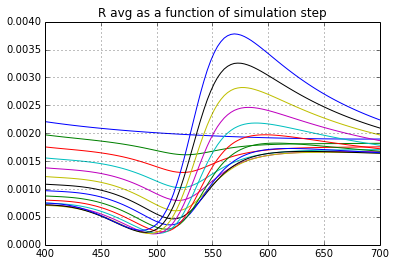

In [10]:
panel['R_avg'].plot(legend=False)
plt.title('R avg as a function of simulation step')
panel['R_avg'].astype(float) #drop complex component, we know it's 0 for Reflectance

Because we are using a `Panel`, slicing nicely returns an a [pandas dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html).  Thus, it's easy to plot and further analyze the data.  We can also pass references to our `input` arrays when generating the panel, so the important values display on the plot.  So if we wanted to plot the values of `selected_material.Vfrac`:

In [11]:
newpanel = s.primary_panel(minor_axis='selected_material.Vfrac', prefix='Vf =' )
newpanel

<class 'pandas.core.panel.Panel'>
Dimensions: 11 (items) x 100 (major_axis) x 15 (minor_axis)
Items axis: A_avg to kz_L3_avg
Major_axis axis: 400.0 to 700.0
Minor_axis axis: Vf =0.0000 to Vf =0.1330

**Notice the minor axis.**  Now I can plot.  I'm going to sample by 2, so as to reduce the number of lines appearing on the plot/legend.

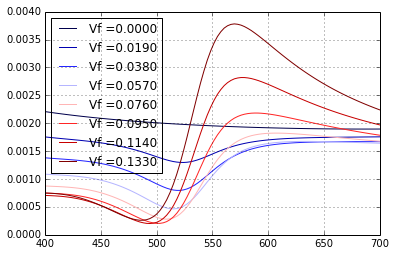

In [12]:
newpanel['R_avg'].iloc[::, ::2].plot(colormap='seismic')
plt.legend.ncol=2

### Results

The `results` attribute stores a deep, neseted dictionary of many simulation results.  Depending on the configuration of the simulation, this can get really large.  Think of results as everything that didn't make it into the primary.  The results are keyed by steps.

In [13]:
s.results.keys()

['step_1',
 'step_0',
 'step_3',
 'step_2',
 'step_5',
 'step_4',
 'step_7',
 'step_6',
 'step_9',
 'step_8',
 'step_12',
 'step_13',
 'step_14',
 'step_11',
 'step_10']

Let's assume there's a result I want to look at but it's not in the primary panel.  Let's dig around: in this case, I'm going to look for the **Extinction Cross Section** of my gold nanoparticles at each step in the simulation.  Let's choose step_0 just to see what traits were stored.  By the way, *results is not an ordinary dictionary, it has nested attribute access*, so you can do `[a.b.c]` instead of `a['b']['c']` as you would with a normal dictionary.

In [14]:
pp(s.results.step_0.keys())

['selected_layer']


In [15]:
pp(s.results.step_0.selected_layer.keys())

['layer_deisgnator', 'material', 'layer_name', 'layer_thickness']


In [16]:
pp(s.results.step_0.selected_layer.material.keys())

['material1',
 'mie_composite',
 'material_medium',
 'r_core',
 'r_plastform',
 'mix',
 'material_core',
 'mie_full',
 'name',
 'material2',
 'platform',
 'earray',
 'material_shell',
 'coverage',
 'Vfrac',
 'shell_thickness',
 'mixing_style',
 'r_particle',
 'narray']


Now we see that this object really does store a lot of information!  **I'm sorry that parsing it is such a pain!**  I know that what I'm looking for will be under **mie_full**.

In [17]:
pp(s.results.step_0.selected_layer.material.mie_full.keys())

['absorbance', 'shell_width', 'extinction', 'scattering', 'r_core']


So at the end of the day, the trait we are after is called:

    'selected_layer.material.mie_full.extinction'
    


We can use **`promote()`**, to push this result into our primary panel.  We can then access it via an "alias keyword".

In [18]:
s.promote('selected_layer.material.mie_full.extinction', alias='ext_cross')

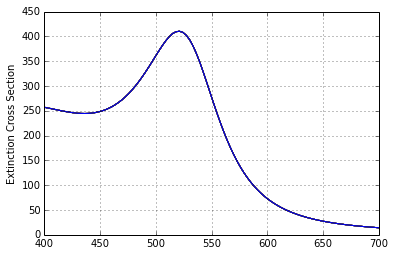

In [19]:
ax = s.primary_panel()['ext_cross'].plot(legend=False)
ax.set_ylabel('Extinction Cross Section');

The reason that these curves all overlap is because the nanoparticle itself did not change at each step of the simulation.  Therefore, we're seeing the same curve at each step.  Had we simulated over a parameter like AuNP shell thickness, this would indeed change. 

##  Part 2- More Operations

## Scikit-Spectra Backend

If you have installed [scikit-spectra](http://hugadams.github.io/scikit-spectra/), you can set the simparser `backend` to `skspec`, and instead of DataFrames, slicing a Panel will result in `Spectra` objects.  These are more convenient for Spectroscopy than standard DataFrames.

In [20]:
from skspec import SpecStack

In [21]:
panel['A_avg']

,step_0,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,step_11,step_12,step_13,step_14
400.000000,(2.86509167645e-17+0j),(0.00509795826333+0j),(0.0102137378801+0j),(0.01534662477+0j),(0.0204958874743+0j),(0.0256607774449+0j),(0.0308405293709+0j),(0.0360343615407+0j),(0.041241476239+0j),(0.0464610601761+0j),(0.051692284949+0j),(0.0569343075313+0j),(0.0621862707916+0j),(0.0674473040385+0j),(0.0727165235906+0j)
403.030303,(-8.59527502936e-17+0j),(0.00507686433163+0j),(0.0101720737966+0j),(0.0152849203257+0j),(0.0204146779794+0j),(0.0255606032267+0j),(0.0307219352617+0j),(0.0358978963581+0j),(0.0410876922578+0j),(0.0462905125941+0j),(0.0515055313461+0j),(0.0567319073247+0j),(0.0619687846865+0j),(0.0672152934754+0j),(0.0724705501907+0j)
406.060606,(1.07440937867e-17+0j),(0.00505534431425+0j),(0.010129529955+0j),(0.0152218552148+0j),(0.0203316000574+0j),(0.0254580263848+0j),(0.030600378345+0j),(0.0357578826761+0j),(0.0409297490878+0j),(0.0461151706761+0j),(0.0513133243719+0j),(0.0565233714207+0j),(0.0617444578918+0j),(0.0669757152157+0j),(0.0722162607491+0j)
409.090909,(1.11022302463e-16+0j),(0.00503295383712+0j),(0.0100851965347+0j),(0.0151560331899+0j),(0.0202447501739+0j),(0.0253506153873+0j),(0.0304728785574+0j),(0.0356107715725+0j),(0.0407635088542+0j),(0.0459302877635+0j),(0.0511102890419+0j),(0.0563026772839+0j),(0.0615066014402+0j),(0.0667211953498+0j),(0.0719455782999+0j)
412.121212,(-7.52086565069e-17+0j),(0.0050108135889+0j),(0.0100412974916+0j),(0.0150907634308+0j),(0.0201585040824+0j),(0.0252437933206+0j),(0.0303458865035+0j),(0.0354640207977+0j),(0.0405974155407+0j),(0.0457452726384+0j),(0.0509067769982+0j),(0.0560810969928+0j),(0.0612673849575+0j),(0.0664647777152+0j),(0.0716723971308+0j)
415.151515,(-5.7301833529e-17+0j),(0.00498907950754+0j),(0.00999817406019+0j),(0.0150266018221+0j),(0.0200736616314+0j),(0.0251386332339+0j),(0.0302207775581+0j),(0.0353193370295+0j),(0.0404335359233+0j),(0.0455625807532+0j),(0.0507056606949+0j),(0.0558619480433+0j),(0.0610305987013+0j),(0.0662107526985+0j),(0.0714015347395+0j)
418.181818,(2.86509167645e-17+0j),(0.00496945088582+0j),(0.0099591587983+0j),(0.0149684470469+0j),(0.0199966194468+0j),(0.025042960542+0j),(0.0301067358705+0j),(0.0351871922691+0j),(0.0402835582167+0j),(0.0453950442142+0j),(0.0505208432004+0j),(0.0556601310007+0j),(0.0608120668084+0j),(0.0659757936975+0j),(0.0711504391633+0j)
421.212121,(-2.14881875734e-17+0j),(0.0049517307082+0j),(0.00992390990374+0j),(0.0149158650061+0j),(0.0199269038208+0j),(0.0249563147535+0j),(0.030003367065+0j),(0.0350673111678+0j),(0.0401473789604+0j),(0.0452427841997+0j),(0.0503527229081+0j),(0.0554763738158+0j),(0.0606128988349+0j),(0.0657614435655+0j),(0.0709211378303+0j)
424.242424,(5.7301833529e-17+0j),(0.00493669317631+0j),(0.00989395328139+0j),(0.0148711103031+0j),(0.0198674745671+0j),(0.024882336942+0j),(0.0299149690868+0j),(0.0349646237389+0j),(0.0400305350414+0j),(0.0451119189077+0j),(0.0502079734222+0j),(0.0553178792758+0j),(0.0604408002341+0j),(0.0655758836372+0j),(0.0707222609295+0j)
427.272727,(1.46835948418e-16+0j),(0.00492647420366+0j),(0.00987353961244+0j),(0.0148405261077+0j),(0.0198267439435+0j),(0.0248314839456+0j),(0.0298540177518+0j),(0.0348935980948+0j),(0.0399494591231+0j),(0.0450208167606+0j),(0.050106869102+0j),(0.0552067968438+0j),(0.0603197637478+0j),(0.0654449171366+0j),(0.0705813884203+0j)


In [22]:
s.backend='skspec'

In [30]:
s.primary_panel(minor_axis='selected_material.Vfrac', prefix='Vf =' )['R_avg']

,Vf =0.0000,Vf =0.0095,Vf =0.0190,Vf =0.0285,Vf =0.0380,Vf =0.0475,Vf =0.0570,Vf =0.0665,Vf =0.0760,Vf =0.0855,Vf =0.0950,Vf =0.1045,Vf =0.1140,Vf =0.1235,Vf =0.1330
400.000000,(0.00220807947571+0j),(0.00197143106514+0j),(0.00175438428713+0j),(0.00155715228429+0j),(0.00137994185831+0j),(0.00122295314702+0j),(0.00108637931384+0j),(0.000970406249885+0j),(0.00087521228865+0j),(0.000800967933341+0j),(0.00074783559692+0j),(0.00071596935488+0j),(0.000705514710814+0j),(0.00071660837479+0j),(0.000749378054585+0j)
403.030303,(0.0021992702977+0j),(0.00196381211536+0j),(0.00174782579687+0j),(0.00155152790049+0j),(0.00137512872291+0j),(0.00121883197142+0j),(0.00108283444842+0j),(0.000967325748421+0j),(0.000872487967511+0j),(0.000798495425414+0j),(0.000745514400127+0j),(0.000713702875231+0j),(0.000703210299877+0j),(0.000714177361537+0j),(0.000746735771522+0j)
406.060606,(0.00219068894941+0j),(0.00195642620459+0j),(0.00174149748601+0j),(0.00154612244916+0j),(0.00137051457324+0j),(0.00121488082893+0j),(0.00107942135853+0j),(0.000964329168296+0j),(0.000869789833301+0j),(0.000795981214621+0j),(0.00074307318908+0j),(0.000711227391512+0j),(0.000700596969622+0j),(0.000711326351502+0j),(0.000743551025831+0j)
409.090909,(0.00218232797994+0j),(0.00194929221303+0j),(0.00173543635993+0j),(0.00154098260694+0j),(0.00136614705905+0j),(0.00121113940446+0j),(0.00107616259114+0j),(0.000961412515647+0j),(0.00086707772412+0j),(0.000793339125584+0j),(0.000740369717617+0j),(0.000708334324414+0j),(0.000697389347314+0j),(0.000707682527851+0j),(0.000739352723389+0j)
412.121212,(0.00217418026554+0j),(0.00194236275518+0j),(0.00172955644728+0j),(0.00153598536207+0j),(0.00136186753998+0j),(0.00120741470384+0j),(0.00107283193307+0j),(0.000958317349857+0j),(0.000864061817353+0j),(0.000790248650107+0j),(0.000737053336615+0j),(0.000704643274151+0j),(0.000693177515912+0j),(0.000702806530533+0j),(0.000733671974057+0j)
415.151515,(0.00216623899269+0j),(0.00193561528341+0j),(0.00172382888697+0j),(0.00153110528249+0j),(0.00135766407258+0j),(0.00120371864384+0j),(0.0010694758391+0j),(0.000955135641535+0j),(0.000860890870658+0j),(0.000786926890316+0j),(0.000733421328687+0j),(0.000700543810387+0j),(0.00068845570073+0j),(0.000697309862229+0j),(0.00072725042338+0j)
418.181818,(0.00215849764217+0j),(0.0019289963647+0j),(0.00171814434164+0j),(0.00152616751934+0j),(0.00135328607257+0j),(0.00119971406456+0j),(0.00106565911858+0j),(0.00095132210123+0j),(0.000856896817508+0j),(0.000782569717631+0j),(0.000728519615766+0j),(0.000694917420694+0j),(0.000681925878474+0j),(0.0006896993272+0j),(0.000718383463903+0j)
421.212121,(0.00215094997416+0j),(0.00192249132407+0j),(0.00171249341259+0j),(0.0015211822144+0j),(0.00134877803364+0j),(0.00119549516393+0j),(0.00106154155976+0j),(0.000947118519436+0j),(0.00085242037963+0j),(0.000777634221571+0j),(0.000722939588994+0j),(0.000688508217873+0j),(0.000674503778031+0j),(0.000681081626696+0j),(0.000708388574077+0j)
424.242424,(0.00214359001428+0j),(0.00191607118761+0j),(0.0017068222916+0j),(0.00151606869837+0j),(0.00134403020565+0j),(0.00119092069732+0j),(0.00105694781521+0j),(0.000942312642392+0j),(0.000847209397874+0j),(0.000771825142871+0j),(0.000716339498677+0j),(0.00068092437621+0j),(0.000665743717323+0j),(0.000670953247937+0j),(0.000696700243086+0j)
427.272727,(0.00213641204038+0j),(0.00190965080323+0j),(0.00170097232933+0j),(0.00151060065557+0j),(0.00133875432899+0j),(0.00118564606836+0j),(0.00105148243694+0j),(0.000936463526652+0j),(0.000840782653531+0j),(0.000764626064744+0j),(0.000708172657065+0j),(0.000671593706995+0j),(0.000655052612549+0j),(0.000658704646802+0j),(0.000682696723272+0j)


In [24]:
type(s.primary_panel()['A_avg'])

skspec.core.spectra.Spectra

In [25]:
x=panel['A_avg']
y=panel['R_avg']

In [26]:
from skspec import Unit

polarization = Unit(
                    short = 'polar',
                    full = 'Polarization',
                    symbol = r'$\theta$',
                      )

In [27]:
panel['A_avg']=y

TypeError: Cannot set item of type: <class 'skspec.core.spectra.Spectra'>

In [ ]:
from skspec import Spectra
z = Spectra(y, specunit='nm', varunit=polarization, iunit='A Avg')

In [ ]:
z.iunit 

In [ ]:
z.columns

In [ ]:
z.reference=0
z.plot(norm='a', legend=True, legstyle=1) #<-- custom legend style

In [ ]:
panel['A_avg']=z

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* skspec@groups.google.com
* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="http://hugadams.github.io/scikit-spectra/" target="_blank">scikit-spectra: Exploratory Spectral Data Analysis</a>
   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>